In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')


## 1. Import the Data

In [2]:
df = pd.read_csv('kohkiloyeh.csv')

In [3]:
df.head()

,Degree,caprice,topic,lmt,lpss,pb
0,high,left,impression,yes,yes,yes
1,high,left,political,yes,yes,yes
2,medium,middle,tourism,yes,yes,yes
3,high,left,political,yes,yes,yes
4,medium,middle,news,yes,yes,yes


## 2. Data Exploration

In [4]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.nunique())

Rows     :  100
Columns  :  6

Features : 
 ['Degree', 'caprice', 'topic', 'lmt', 'lpss', 'pb']

Missing values :   0

Unique values :  
 Degree     3
caprice    3
topic      5
lmt        2
lpss       2
pb         2
dtype: int64


### Dataset Description:

###### 1. Degree : 
This attribute shows the education level of a blogger and has three values; 
            Low: for less educated people,
            Medium: for B.Sc. level, and 
            High: for M.Sc. and Ph.D.

###### 2. Caprice: 
(Political Caprice) : It shows political affiliation of a blogger It has also three values; 
            LEFT: Bloggers affiliated with reformists party, 
            MIDDLE: bloggers who have no political affiliations, and 
            RIGHT: bloggers affiliated with traditional conservative party.

###### 3. Topics:  
Bloggers are intended to blog in five areas named Impression, Political, Tourism, Scientific, and News.

###### 4. LMT   :  
(Local Media Turnover) This attribute has two possible values: Yes/ No. “Yes,” value is used for those bloggers who believe in local media effect on blogging and vice-versa.

###### 5. LPSS  : 
(Local, Political and Social Space) This attribute has also Yes/No values. “Yes,” value is used to denote those bloggers who believe that local, social and political conditions affect blogging and vice-versa.

###### 6. Pb    :  
(Professional Blogger) It is target class with Yes/No values. “Yes” value denotes a professional blogger, and “No” value indicates a temporary blogger.

##### 2.1 Get the Summary of the Data se

In [5]:
for i in df.columns:
    print(df[i].value_counts())
    print()

medium    47
high      39
low       14
Name: Degree, dtype: int64

left      52
right     34
middle    14
Name: caprice, dtype: int64

political     35
impression    24
news          19
tourism       15
scientific     7
Name: topic, dtype: int64

yes    86
no     14
Name: lmt, dtype: int64

yes    72
no     28
Name: lpss, dtype: int64

yes    68
no     32
Name: pb, dtype: int64



In [6]:
# Target is "pb"
df['pb'].unique()

array(['yes', 'no'], dtype=object)

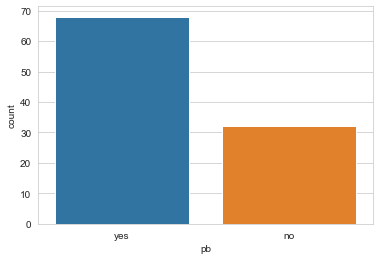

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='pb', data=df)

* Date set consists of hundred instances among which sixty-eight
   instances are positive and the remaining instances are negative.

* Positive instances represent professional bloggers and negative
    instances indicate non-professional/ seasonal bloggers

##### 2.2 Plot the Features across Target Class

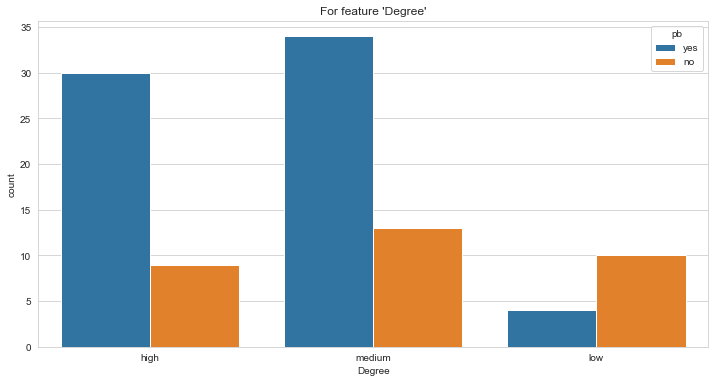

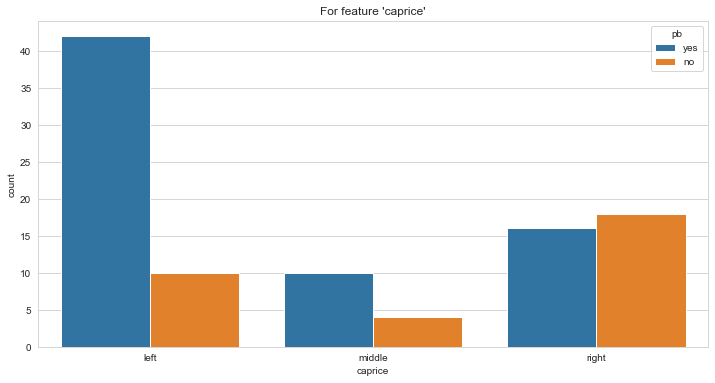

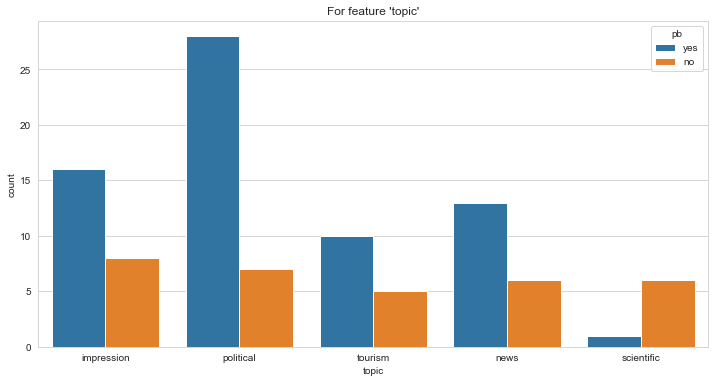

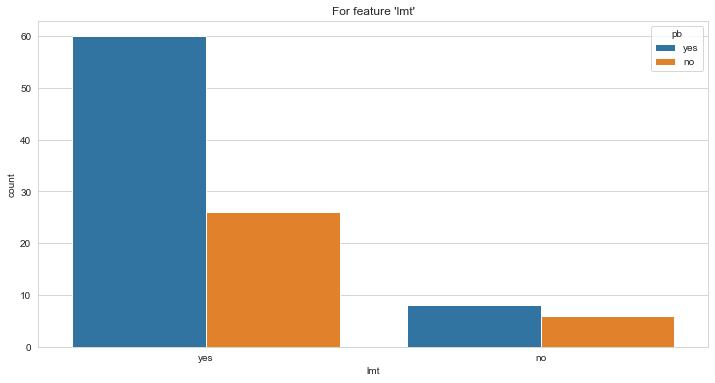

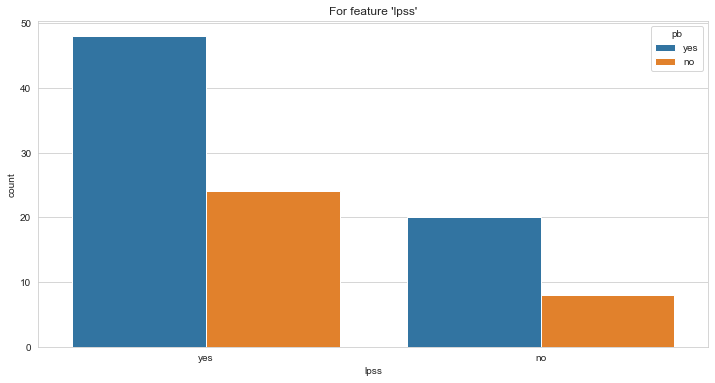

In [8]:
for i in df.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'" %i)
    sns.countplot(df[i],hue=df['pb'])

## 3. Data Preprocessing

##### 3.1 Convert Object to Integer Values

In [9]:
df.head()

,Degree,caprice,topic,lmt,lpss,pb
0,high,left,impression,yes,yes,yes
1,high,left,political,yes,yes,yes
2,medium,middle,tourism,yes,yes,yes
3,high,left,political,yes,yes,yes
4,medium,middle,news,yes,yes,yes


In [10]:
tdf = df.copy()

#### 3.2 Encoding Data ( Factorization )

In [11]:
df['Degree'],Degree = pd.factorize(df['Degree'])
df['caprice'],caprice = pd.factorize(df['caprice'])
df['topic'],topic = pd.factorize(df['topic'])
df['lmt'],lmt = pd.factorize(df['lmt'])
df['lpss'],lpss = pd.factorize(df['lpss'])
df['pb'],pb = pd.factorize(df['pb'])

In [12]:
print(df['Degree'].unique())
print("Degree {}".format(Degree))
print(df['caprice'].unique())
print("caprice {}".format(caprice))
print(df['topic'].unique())
print("topic {}".format(topic))
print(df['lmt'].unique())
print("lmt {}".format(lmt))
print(df['lpss'].unique())
print("lpss {}".format(lpss))
print(df['pb'].unique())
print("pb {}".format(pb))

[0 1 2]
Degree Index(['high', 'medium', 'low'], dtype='object')
[0 1 2]
caprice Index(['left', 'middle', 'right'], dtype='object')
[0 1 2 3 4]
topic Index(['impression', 'political', 'tourism', 'news', 'scientific'], dtype='object')
[0 1]
lmt Index(['yes', 'no'], dtype='object')
[0 1]
lpss Index(['yes', 'no'], dtype='object')
[0 1]
pb Index(['yes', 'no'], dtype='object')


## 4. Model Creating

##### 4.1 Split Data X ( Features), y (Target)

In [13]:
X = df.iloc[:, :5]

y = df.iloc[:,-1]

In [14]:
X.head()

,Degree,caprice,topic,lmt,lpss
0,0,0,0,0,0
1,0,0,1,0,0
2,1,1,2,0,0
3,0,0,1,0,0
4,1,1,3,0,0


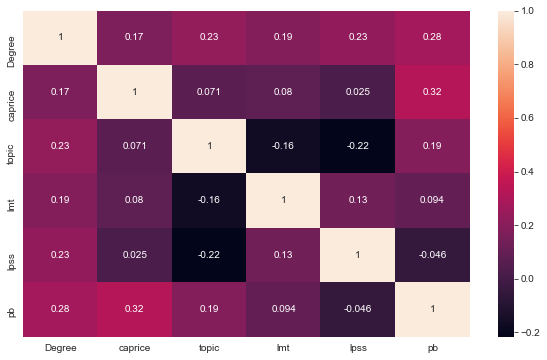

In [15]:
#Plot Correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

### 4.2 Apply One Hot Encoding On Data

In [16]:
tdf.head()

,Degree,caprice,topic,lmt,lpss,pb
0,high,left,impression,yes,yes,yes
1,high,left,political,yes,yes,yes
2,medium,middle,tourism,yes,yes,yes
3,high,left,political,yes,yes,yes
4,medium,middle,news,yes,yes,yes


In [17]:
XTdf = tdf.iloc[:, :5]

ytdf = tdf.iloc[:,-1]



In [18]:
XD = pd.get_dummies(XTdf,drop_first=True)

In [19]:
XD.head()

,Degree_low,Degree_medium,caprice_middle,caprice_right,topic_news,topic_political,topic_scientific,topic_tourism,lmt_yes,lpss_yes
0,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,1,0,0,1,1
2,0,1,1,0,0,0,0,1,1,1
3,0,0,0,0,0,1,0,0,1,1
4,0,1,1,0,1,0,0,0,1,1


### 4.5 Apply Decision Tree CART algorithm on One Hot Encoded Data

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
XD_train, XD_test, yd_train, yd_test = train_test_split(XD, ytdf, test_size=0.30, random_state=9)
#dctree = DecisionTreeClassifier(criterion='gini', max_depth=6)

In [21]:
dctree = DecisionTreeClassifier(max_depth=5)

In [22]:
dtree = dctree.fit(XD, ytdf)
#dtree = dctree.fit(one_hot_data, y)

In [23]:
dctree_pred = dtree.predict(XD) 
print("Predicted values:") 
dctree_pred

print("Confusion Matrix: ", confusion_matrix(ytdf, dctree_pred)) 
      
print ("Accuracy : ", accuracy_score(ytdf,dctree_pred)*100) 

print("Report : ", classification_report(ytdf, dctree_pred))

Predicted values:
Confusion Matrix:  [[22 10]
 [ 0 68]]
Accuracy :  90.0
Report :                precision    recall  f1-score   support

          no       1.00      0.69      0.81        32
         yes       0.87      1.00      0.93        68

    accuracy                           0.90       100
   macro avg       0.94      0.84      0.87       100
weighted avg       0.91      0.90      0.89       100



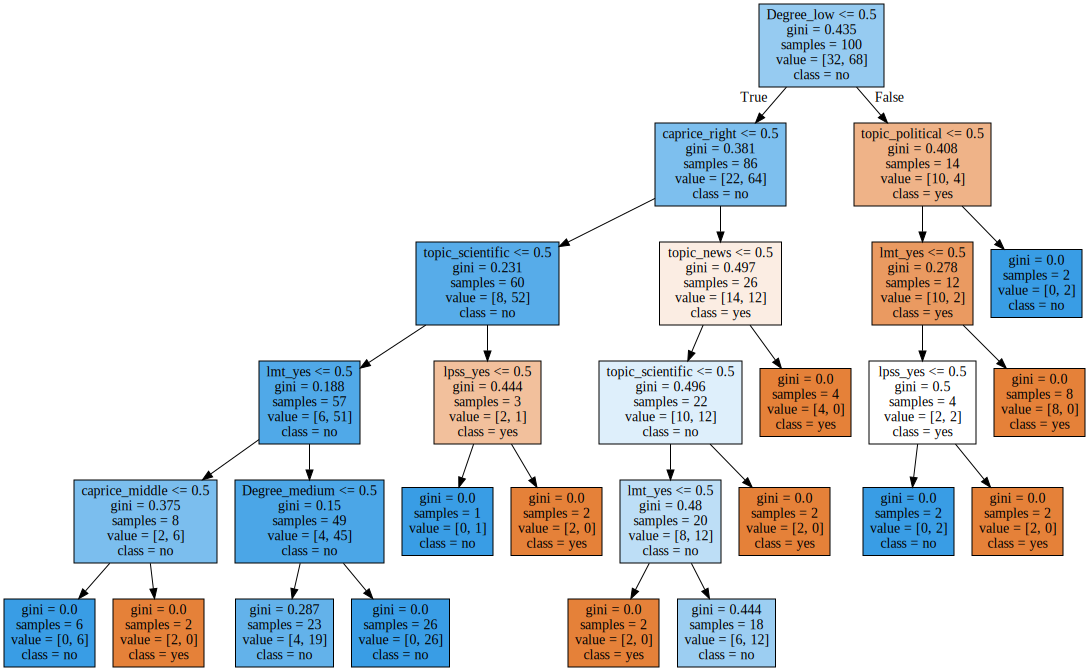

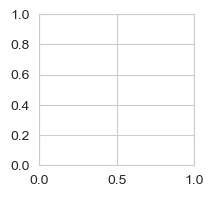

In [24]:
fn=['Degree_low', 'Degree_medium', 'caprice_middle', 'caprice_right', 'topic_news', 'topic_political','topic_scientific','topic_tourism', 'lmt_yes', 'lpss_yes']
cn=['yes', 'no']

import graphviz
# DOT data

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=100)
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=fn,  
                                class_names=cn,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph